In [1]:
import torch
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%cd ../Projekt-Magisterski/
from workspace.pose_3d.dataset import KeypointsMatrix
from torch.utils.data import DataLoader
import numpy as np
from matplotlib import pyplot
import pandas as pd
import torch
from workspace.pose_3d.models.model import LSTM

/raid/s175668/Praca-Magisterska/Repozytorium/Projekt-Magisterski


In [28]:
file_name = 'model_cg_with_aug_001'

In [29]:
def calculate_values(train_data, test_data, model):
    y_pred = []
    y_true = []
    for data in train_data:
        x, y = data
        y_hat = model(x.unsqueeze(0))
        y_pred.append(y_hat.item())
        y_true.append(y.item())
        
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    mse_train = mean_squared_error(y_true, y_pred)
    
    y_pred[y_pred<0.5] = 0.
    y_pred[y_pred>=0.5] = 1. 
    
    acc_train = accuracy_score(y_true, y_pred)
    
    
    y_pred = []
    y_true = []
    for data in test_data:
        x, y = data
        y_hat = model(x.unsqueeze(0))
        y_pred.append(y_hat.item())
        y_true.append(y.item())
        
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    mse_val = mean_squared_error(y_true, y_pred)
    
    y_pred[y_pred<0.5] = 0.
    y_pred[y_pred>=0.5] = 1. 
    
    acc_val = accuracy_score(y_true, y_pred)
    
    return acc_train, acc_val, mse_train, mse_val
#     mse_train = mean_squared_error(y_true, y_pred)
#     y_pred

In [30]:
from sklearn.metrics import mean_squared_error

def plots_columns_bats(model, camera, cordinates, height, select, min_max, cg, vf):
    shooter = ['adam', 'krystian', 'kuba', 'gustaw']
    label = ['ALL', '1', '2', '3', '4']
    val_mse = []
    val_accuracy = []
    train_mse = []
    train_accuracy = []

    training_set = KeypointsMatrix('/home/s175668/raid/Praca-Magisterska/dataset/folds/made/train_made_balance.csv',
                             camera=camera, cordinates_move=cordinates, height_normalize=height,
                            signal_normalize_0_1=min_max, cg=cg, vf=vf, choose_points=select)
    
    test_set = KeypointsMatrix('/home/s175668/raid/Praca-Magisterska/dataset/folds/made/val_made_balance.csv',
                             camera=camera, cordinates_move=cordinates, height_normalize=height,
                            signal_normalize_0_1=min_max, cg=cg, vf=vf, choose_points=select)
    
    
    
    acc_train, acc_val, mse_train, mse_val = calculate_values(training_set, test_set, model)
    
    train_accuracy.append(acc_train)
    val_accuracy.append(acc_val)
    train_mse.append(mse_train)
    val_mse.append(mse_val)
    
    
    for i, s in enumerate(shooter):
        training_set = KeypointsMatrix('/home/s175668/raid/Praca-Magisterska/dataset/folds/made/train_made_balance.csv',
                             shoter=s, camera=camera, cordinates_move=cordinates, height_normalize=height,
                            signal_normalize_0_1=min_max, cg=cg, vf=vf, choose_points=select)
    
        test_set = KeypointsMatrix('/home/s175668/raid/Praca-Magisterska/dataset/folds/made/val_made_balance.csv',
                                     shoter=s, camera=camera, cordinates_move=cordinates, height_normalize=height,
                                    signal_normalize_0_1=min_max, cg=cg, vf=vf, choose_points=select)
        
        acc_train, acc_val, mse_train, mse_val = calculate_values(training_set, test_set, model)
    
        train_accuracy.append(acc_train)
        val_accuracy.append(acc_val)
        train_mse.append(mse_train)
        val_mse.append(mse_val)


    df_mse = pd.DataFrame({'val': val_mse,
                       'train': train_mse}, index=label)

    df_accuracy = pd.DataFrame({'val': val_accuracy,
                       'train': train_accuracy}, index=label)

    return df_mse, df_accuracy
    
    

In [31]:
model_path = '/home/s175668/raid/Praca-Magisterska/models_new/001_model_0.1_both.pt'

In [32]:
model = LSTM(2, 0.2, 12, 4, 0.2)
model.load_state_dict(torch.load(model_path))
model.eval()

LSTM(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (relu): ReLU()
  (leaky_relu): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.2, inplace=False)
  (sigmoid): Sigmoid()
  (lstm): LSTM(36, 12, num_layers=4, batch_first=True, dropout=0.2)
  (conv1_d): Conv1d(36, 36, kernel_size=(5,), stride=(1,), padding=same)
  (linear_1): Linear(in_features=216, out_features=108, bias=True)
  (linear_2): Linear(in_features=108, out_features=1, bias=True)
  (linear_out): Linear(in_features=216, out_features=1, bias=True)
)

In [33]:
df_mse, df_acc = plots_columns_bats(model, camera=None, cordinates=False, height=False, select=True,
                  min_max=False, cg =True, vf=False)

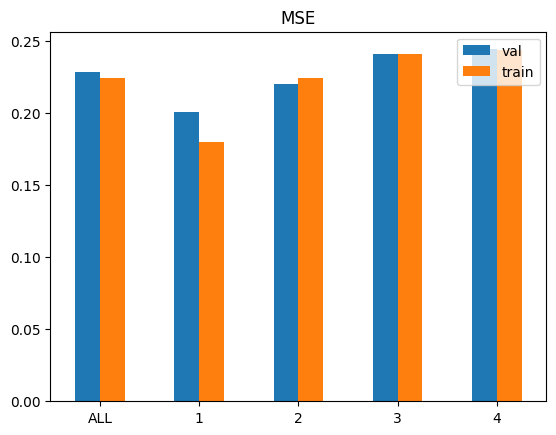

In [34]:
ax = df_mse.plot.bar(rot=0, title='MSE').legend(loc=1)
ax.figure.savefig(save_root/ f'{file_name}_mse.png')

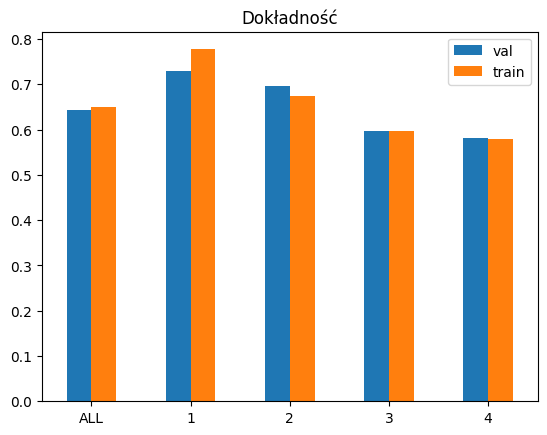

In [35]:
ax = df_accuracy.plot.bar(rot=0, title='Dokładność').legend(loc=1)
ax.figure.savefig(save_root/ f'{file_name}_acc.png')

In [22]:
save_root = Path('/home/s175668/raid/Praca-Magisterska/visualization/accu')

In [21]:
from pathlib import Path

# Withou AUG

In [27]:
df_acc

,val,train
ALL,0.631667,0.647328
1,0.728606,0.777237
2,0.659155,0.669937
3,0.589655,0.597330
4,0.576754,0.576503


In [37]:
df_mse

,val,train
ALL,0.228438,0.224227
1,0.200645,0.179676
2,0.220087,0.223859
3,0.240853,0.240645
4,0.244076,0.243679
